## Random forest

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np

housing = pd.read_csv('Data/housing.csv')

housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]


### Concepto total de variables

Árbol normal

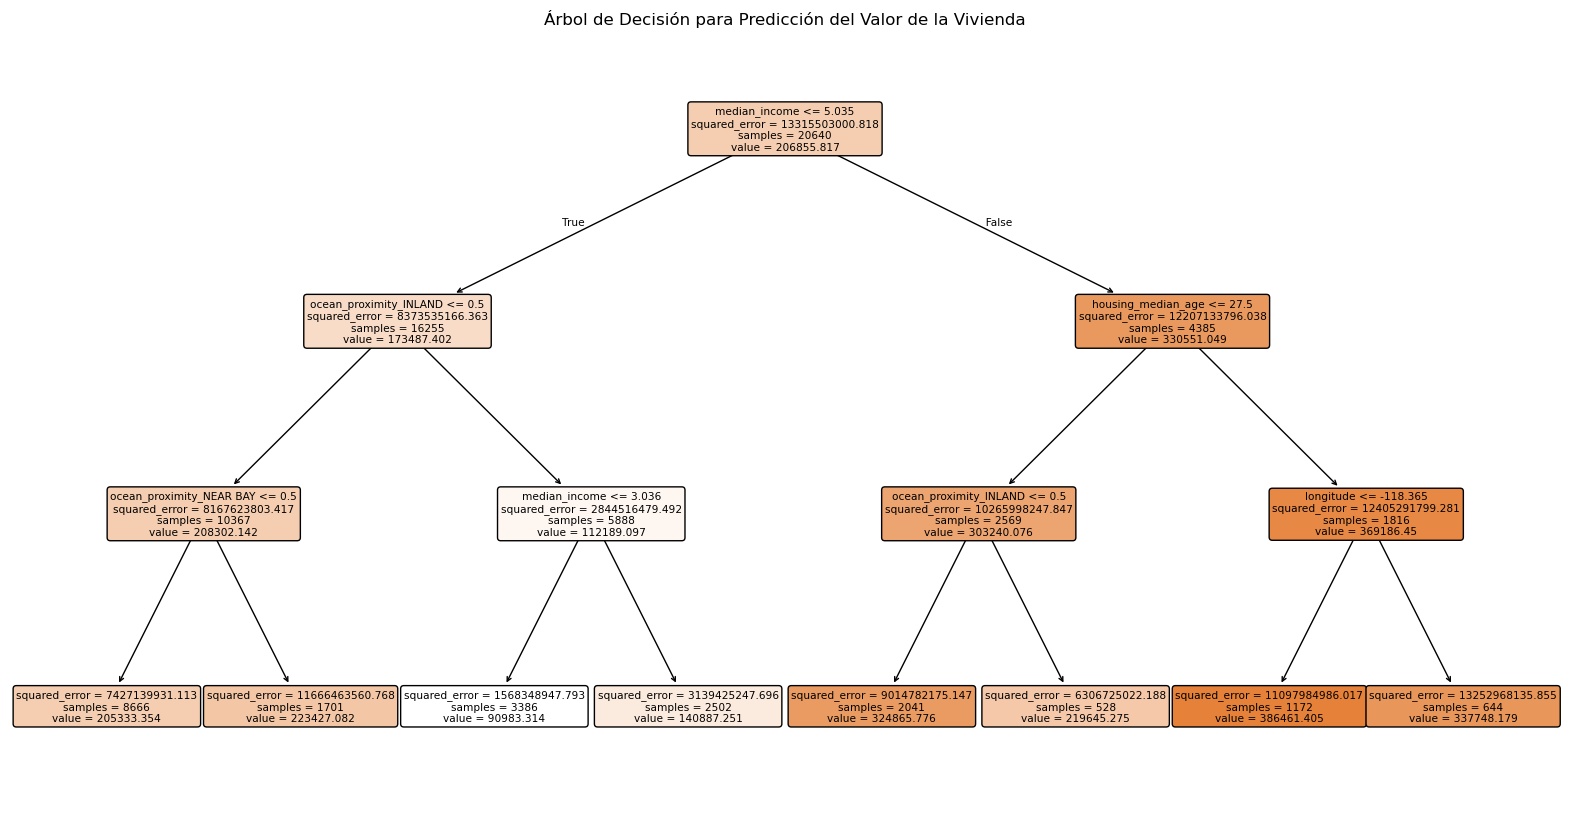

In [2]:
# Train model    
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 3 features

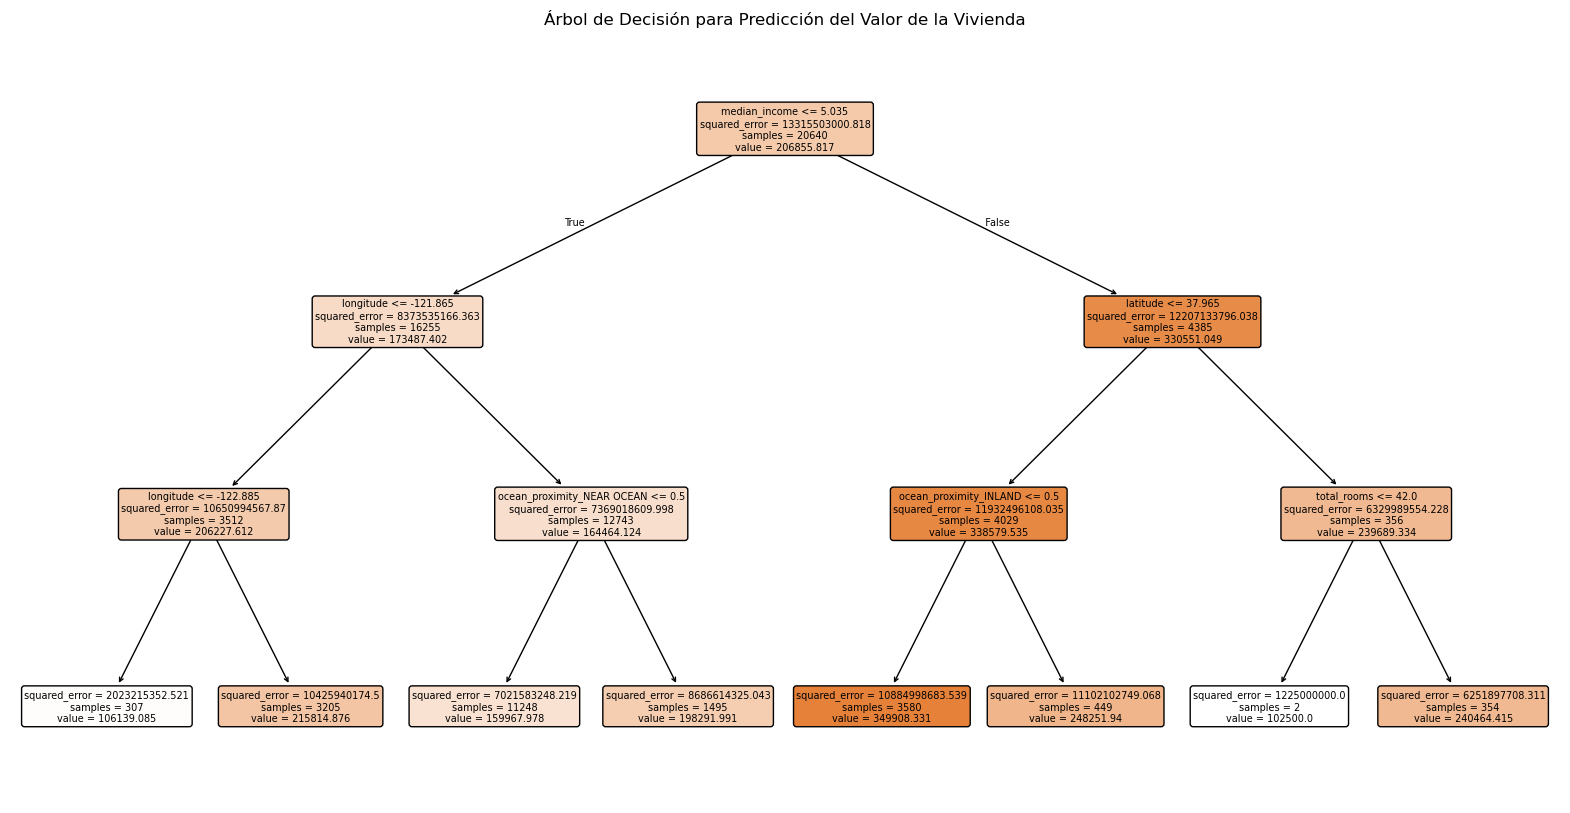

In [3]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=3, random_state=42, 
                                  max_features=2)
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Maximo 2 features


In [5]:
# Crear y entrenar el modelo de árbol de decisión


In [6]:
# Random int


### Bootstrap tree

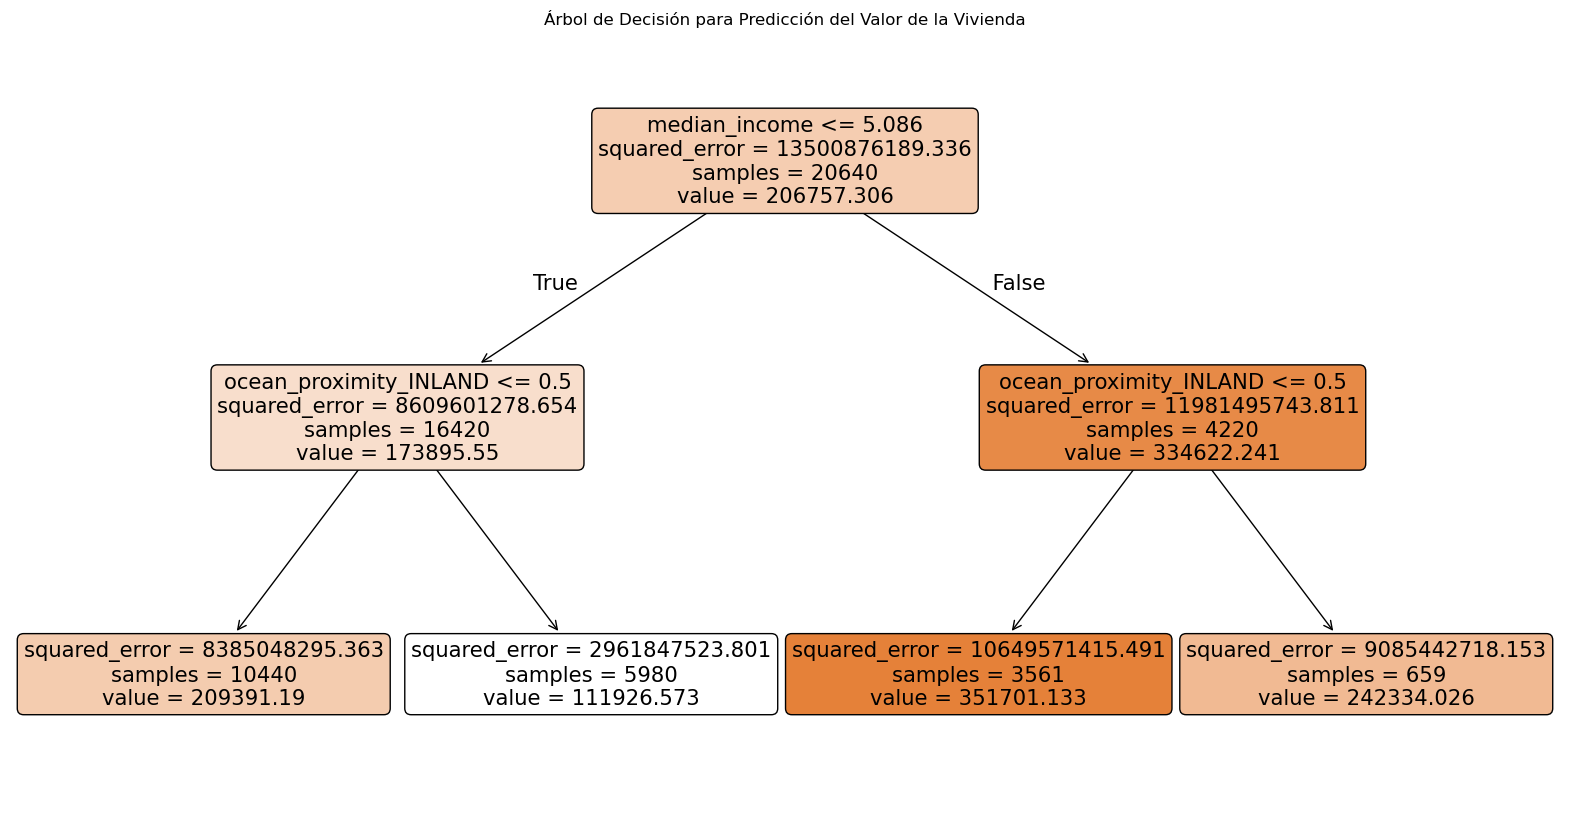

In [6]:
# Crea un bootrap tree, cambia el random_state

bootstrap_housing =housing.sample(len(housing), replace=True)
X = bootstrap_housing.copy().drop(target, axis=1)
y = bootstrap_housing[target]

model = DecisionTreeRegressor(max_depth=2, random_state=42, 
                                  max_features='sqrt')
model.fit(X, y)

plt.figure(figsize=(20, 10)) 
plot_tree(model, feature_names=X.keys(), filled=True, rounded=True)
plt.title("Árbol de Decisión para Predicción del Valor de la Vivienda")
plt.show()

### Crea un bosque 

In [7]:
import random
random_states = np.linspace(0, 100, 100)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
# X train y test
# Dividir en entrenamiento y prueba
test_bootstrap = housing.sample(300)
X_sample = test_bootstrap.copy().drop(target, axis=1)
y_sample = test_bootstrap[target]

df_predicciones = pd.DataFrame()

for i in range(100):
     bootstrap_housing =housing.sample(len(housing), replace=True)
     X = bootstrap_housing.copy().drop(target, axis=1)
     y = bootstrap_housing[target]

     #Train model
     model = DecisionTreeRegressor(max_depth=8, random_state=i, 
                                   max_features=len(X_sample.keys()))
     model.fit(X, y)

     prediccion = model.predict(X_sample)
     df_predicciones['prediccion_'+str(i)] = prediccion

In [27]:
predicciones_rf = df_predicciones.mean(axis=1)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_true=y_sample, y_pred=predicciones_rf)

0.7496740814295086

### Usando Sklearn

In [32]:
from sklearn.ensemble import RandomForestRegressor

housing = pd.read_csv('Data/housing.csv')
housing = housing.fillna(-1)
housing = pd.get_dummies(housing, drop_first=True)
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [33]:
# Grid search 
pipeline = Pipeline([
     ('rf', RandomForestRegressor(n_estimators=300, n_jobs=-1))
])

params = {
     'rf__max_depth': [8, 10, 15],
     'rf__max_features': ['log2', 'sqrt', 10, 12],
}
rf_grid = GridSearchCV(estimator=pipeline, param_grid=params, cv=5, n_jobs=-1, scoring="r2")
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(n_estimators=300,
                                                              n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [8, 10, 15],
                         'rf__max_features': ['log2', 'sqrt', 10, 12]},
             scoring='r2')

In [34]:
rf_grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 10}

In [35]:
best_model = rf_grid.best_estimator_.named_steps["rf"]


In [36]:
predicciones_rf = best_model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_rf)

0.8110637148155012

In [38]:
# Comparar con regresion lineal 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
predicciones_lr = model.predict(X_test)
r2_score(y_true=y_test, y_pred=predicciones_lr)

0.6146061359095151

# Interpretacion del modelo

## Partial dependence plot


Un Partial Dependence Plot (PDP) muestra la relación entre una o más características y la predicción de un modelo, manteniendo las demás variables fijas. Es útil para entender cómo un modelo como un Random Forest toma decisiones.

fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(best_forest, X_train, [7], ax=ax, feature_names=X_train.keys())


In [11]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay


### Partial dependence 3D
PartialDependenceDisplay.from_estimator(best_forest, X_train, [(0, 1)], ax=ax, feature_names=X_train.keys())